In [1]:
import setGPU

import numpy as np
import matplotlib.pyplot as plt
import os, shutil, sys
import scipy.io as sio

import tensorflow as tf

sys.path.append('../scripts')

from autoencoder_models_testing import *
from data_reading import *

setGPU: Setting GPU to: 1


/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3

In [2]:
model_path = '/mnt/data/Veeru_backup/cv_exp/src/AE/outputs/model/Apr-03-20/aecnn_MD_final.h5'
feat_ext = feature_extraction()
model = feat_ext.load_ae_model(model_path)
data_read = data_reading()
model.summary()

encoder_model = feat_ext.extract_encoder_from_model(model)
encoder_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 16)      4624      
_____________________________________

In [3]:
#extract reconstructed output
data_path = '/mnt/data/Veeru_backup/cv_exp/data/movie_titles/ae_models_test_data/'
predictions, filenames = feat_ext.extract_features_idg(model, data_path)

Found 10462 images belonging to 4 classes.


In [4]:
print(predictions.shape, len(filenames))

(10462, 224, 224, 3) 10462


In [5]:
def display_original_reconstructed_images(n, images, predictions):
    plt.figure(figsize=(24,4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        if i == 0:
            plt.title('original_images', fontsize=18)
        plt.imshow(images[i].reshape(128,128,3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(2, n, i+1+n)
        if i == 0:
            plt.title('reconstructed_images', fontsize=18)
        plt.imshow(predictions[i].reshape(224, 224, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

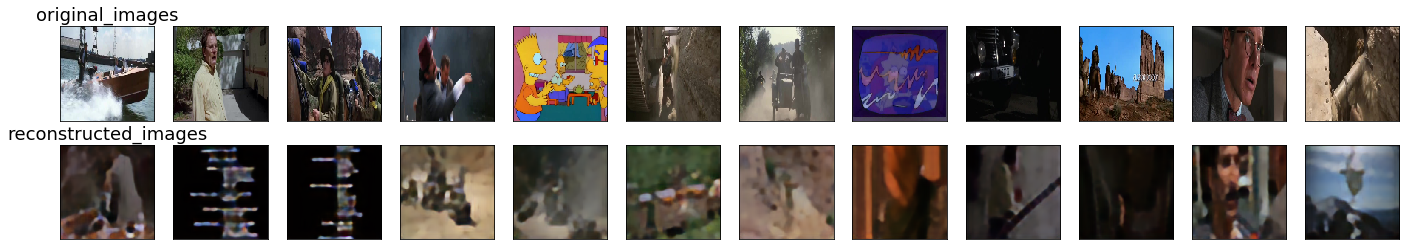

In [6]:
num_images = 12
original_images = []
reconstructed_images = []
for ind in range(num_images):
    rInd = np.random.randint(0, len(filenames)-1)
    file_name = os.path.join(data_path, filenames[rInd])
    img = data_read.get_img(file_name)
    original_images.append(img)
    reconstructed_images.append(predictions[rInd])
    
display_original_reconstructed_images(num_images, original_images, reconstructed_images)

In [ ]:
#read and disply original images by giving path using matplot lib
def read_display_images(path):
    images = []
    for fname in os.listdir(path):
        f_path = os.path.join(path, fname)
        img = data_read.get_img(f_path)
        images.append(img)
        
    n = int(len(images)/2)
    plt.figure(figsize=(24,4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(images[i].reshape(128,128,3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(images[i].reshape(128, 128, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [ ]:
def display_encoder_embeddings(images):
    encoded_imgs = encoder.predict(x_test)
    print(encoded_imgs.shape)
    n = 10
    plt.figure(figsize=(20, 8))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(encoded_imgs[i].reshape(32, 8*8).T) # 3 layer network
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()